<h1 style='color:#1469e0'>Examen Final Modulo 1 </h1>

In [406]:
#Librerias
import pandas as pd
import numpy as np
import missingno as msno
#Visualizacion
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import cufflinks as cf

<h3 style='color:#4416c4'>Funciones</h3>

In [407]:
def completitud(df):
    comple=pd.DataFrame(df.isnull().sum())
    comple.reset_index(inplace=True)
    comple=comple.rename(columns={"index":"columna",0:"total"})
    comple["completitud"]=(1-comple["total"]/df.shape[0])*100
    comple=comple.sort_values(by="completitud",ascending=True)
    comple.reset_index(drop=True,inplace=True)
    return comple

In [408]:
def bar(df,col,title,x_title="",y_title=""):
    layout = go.Layout(font_family="Courier New, monospace",
    font_color="black",title_text=title,title_font_size=30,xaxis= {"title": {"text": x_title,"font": {"family": 'Courier New, monospace',"size": 18,
        "color": '#002e4d'}}},yaxis= {"title": {"text": y_title,"font": {"family": 'Courier New, monospace',"size": 18,
        "color": '#002e4d'}}},title_font_family="Courier New, monospace",title_font_color="#004878",template="plotly_white")
    aux=pd.DataFrame(df[col].value_counts()).reset_index().rename(columns={"index":"conteo"})
    fig=aux.iplot(kind='bar',x="conteo",y=col,title=title,asFigure=True,barmode="overlay",sortbars=True,color="#255479",layout=layout)
    fig.update_layout(width=800)
    fig.update_traces(marker_color='#005a96')
    return fig

<h3 style='color:#4416c4'>Carga de Datos</h3>

In [409]:
#Carga de conjunto de datos que seran trabajados 
df= pd.read_csv('data_examen.csv')
ocupacion=pd.read_csv('ocupaciones_examen.csv')

In [410]:
#Mostramos el conjunto de datos cargado 
df

,ID_CLIENT,ID_SHOP,SEX,MARITAL_STATUS,AGE,QUANT_DEPENDANTS,EDUCATION,FLAG_RESIDENCIAL_PHONE,AREA_CODE_RESIDENCIAL_PHONE,PAYMENT_DAY,...,QUANT_BANKING_ACCOUNTS,PERSONAL_REFERENCE_#1,PERSONAL_REFERENCE_#2,FLAG_MOBILE_PHONE,FLAG_CONTACT_PHONE,PERSONAL_NET_INCOME,COD_APPLICATION_BOOTH,QUANT_ADDITIONAL_CARDS_IN_THE_APPLICATION,FLAG_CARD_INSURANCE_OPTION,tgt
0,2,15,F,S,18.0,0,NaN,Y,31,20,...,0,SARA,FELIPE,N,N,300.0,0,0,N,0
1,4,12,F,C,NaN,0,NaN,N,31,25,...,0,JACI,VALERIA ALEXANDRA TRAJANO,N,N,304.0,0,0,N,0
2,5,16,F,S,28.0,0,NaN,Y,31,25,...,0,NaN,SANDRO L P MARTINS,N,N,250.0,0,0,N,0
3,6,24,M,S,26.0,0,NaN,N,31,28,...,0,NaN,ANA,N,N,800.0,0,0,N,0
4,7,55,F,S,22.0,0,NaN,Y,31,12,...,0,NaN,NaN,N,N,410.0,0,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50995,29197,16,F,S,72.0,0,NaN,Y,31,23,...,0,VANESSA ARMADA ( AMIGA ),GISELE ARMADA,N,N,400.0,0,0,N,0
50996,43802,23,F,S,31.0,0,NaN,Y,31,18,...,0,ROSANA,DELCI,N,N,900.0,0,0,N,1
50997,1881,4,F,C,51.0,0,NaN,Y,31,20,...,0,LUCIANA DE OLIVEIRA,ELIANE DOS SANTOS,N,N,280.0,0,0,N,0
50998,42857,25,F,C,71.0,0,NaN,Y,50,12,...,0,RAIMUNDA,NaN,N,N,1100.0,0,0,N,0


In [411]:
#Tabla relacional de ocupacion 
ocupacion

,PROFESSION_CODE,PROFESSION
0,999,Healthcare Practitioners and Technical
1,950,Healthcare Practitioners and Technical
2,13,Educational Instruction and Library
3,205,Production
4,703,Educational Instruction and Library
...,...,...
290,152,Production
291,516,"Life, Physical, and Social Science"
292,50,Educational Instruction and Library
293,850,"Life, Physical, and Social Science"


In [412]:
#Cantidad del dataFrame
df.shape

(51000, 32)

<h1 style = 'color:#e83a3a'> 1. Calidad de datos</h1>

La calidad de los datos permite preparar y gestionar los datos. 
Los datos de alta calidad permiten a los sistemas estratégicos integrar todos los datos relacionados para proporcionar una visión completa de la organización y las interrelaciones dentro de la misma.

<h2 style="color:#e0751d"> Etiquetado de variables </h2>

In [413]:
#Prefijos para los tipos de variables
#La siguiente nomenclatura se trabajara en el módulo
# "c_"  - Variables numericas : Discretas y continuas
# "v_"  - Variables categoricas
# "d_"  - Variables tipo fecha
# "t_"  - Variables de texto : comentarios, descripciones, url
# "g_"  - Variables geograficas

In [414]:
#Esto devuelve una serie con el tipo de datos de cada columna y la ocupo para identificar todas las columnas
df.columns

Index(['ID_CLIENT', 'ID_SHOP', 'SEX', 'MARITAL_STATUS', 'AGE',
       'QUANT_DEPENDANTS', 'EDUCATION', 'FLAG_RESIDENCIAL_PHONE',
       'AREA_CODE_RESIDENCIAL_PHONE', 'PAYMENT_DAY', 'SHOP_RANK',
       'RESIDENCE_TYPE', 'MONTHS_IN_RESIDENCE', 'FLAG_MOTHERS_NAME',
       'FLAG_FATHERS_NAME', 'FLAG_RESIDENCE_TOWN=WORKING_TOWN',
       'FLAG_RESIDENCE_STATE=WORKING_STATE', 'MONTHS_IN_THE_JOB',
       'PROFESSION_CODE', 'MATE_INCOME',
       'FLAG_RESIDENCIAL_ADDRESS=POSTAL_ADDRESS', 'FLAG_OTHER_CARD',
       'QUANT_BANKING_ACCOUNTS', 'PERSONAL_REFERENCE_#1',
       'PERSONAL_REFERENCE_#2', 'FLAG_MOBILE_PHONE', 'FLAG_CONTACT_PHONE',
       'PERSONAL_NET_INCOME', 'COD_APPLICATION_BOOTH',
       'QUANT_ADDITIONAL_CARDS_IN_THE_APPLICATION',
       'FLAG_CARD_INSURANCE_OPTION', 'tgt'],
      dtype='object')

In [415]:
#Clasificacion segun mi criterio basandome en los datos que arroja y el diccionario de datos en excel 
c_feats=['ID_CLIENT',
         'ID_SHOP',
         'AGE',
         'QUANT_DEPENDANTS',
         'PAYMENT_DAY',
         'SHOP_RANK',
         'AREA_CODE_RESIDENCIAL_PHONE',
         'MONTHS_IN_RESIDENCE',
         'MATE_INCOME',
         'PERSONAL_NET_INCOME',
         'COD_APPLICATION_BOOTH',
         'PROFESSION_CODE',
         'QUANT_ADDITIONAL_CARDS_IN_THE_APPLICATION',
         'MONTHS_IN_THE_JOB',
         'QUANT_BANKING_ACCOUNTS']

v_feats=['SEX',
         'EDUCATION',
         'MARITAL_STATUS',
         'FLAG_MOTHERS_NAME',
         'FLAG_FATHERS_NAME',
         'FLAG_RESIDENCE_STATE=WORKING_STATE',
         'FLAG_RESIDENCIAL_ADDRESS=POSTAL_ADDRESS',
         'FLAG_OTHER_CARD',
         'RESIDENCE_TYPE',
         'FLAG_RESIDENCE_TOWN=WORKING_TOWN',
         'FLAG_RESIDENCIAL_PHONE',
         'FLAG_MOBILE_PHONE',
         'FLAG_CONTACT_PHONE',
         'FLAG_CARD_INSURANCE_OPTION']


t_feats=['PERSONAL_REFERENCE_#1',
         'PERSONAL_REFERENCE_#2']

In [416]:
#Clasificación asiganda 
c_feats_new=["c_"+x for x in c_feats]
v_feats_new=["v_"+x for x in v_feats]
t_feats_new=["t_"+x for x in t_feats]

In [417]:
#Para comprobar que han sido colocadas en las nuevas variables 
c_feats_new

['c_ID_CLIENT',
 'c_ID_SHOP',
 'c_AGE',
 'c_QUANT_DEPENDANTS',
 'c_PAYMENT_DAY',
 'c_SHOP_RANK',
 'c_AREA_CODE_RESIDENCIAL_PHONE',
 'c_MONTHS_IN_RESIDENCE',
 'c_MATE_INCOME',
 'c_PERSONAL_NET_INCOME',
 'c_COD_APPLICATION_BOOTH',
 'c_PROFESSION_CODE',
 'c_QUANT_ADDITIONAL_CARDS_IN_THE_APPLICATION',
 'c_MONTHS_IN_THE_JOB',
 'c_QUANT_BANKING_ACCOUNTS']

In [418]:
#Para comprobar que han sido colocadas en las nuevas variables 
v_feats_new

['v_SEX',
 'v_EDUCATION',
 'v_MARITAL_STATUS',
 'v_FLAG_MOTHERS_NAME',
 'v_FLAG_FATHERS_NAME',
 'v_FLAG_RESIDENCE_STATE=WORKING_STATE',
 'v_FLAG_RESIDENCIAL_ADDRESS=POSTAL_ADDRESS',
 'v_FLAG_OTHER_CARD',
 'v_RESIDENCE_TYPE',
 'v_FLAG_RESIDENCE_TOWN=WORKING_TOWN',
 'v_FLAG_RESIDENCIAL_PHONE',
 'v_FLAG_MOBILE_PHONE',
 'v_FLAG_CONTACT_PHONE',
 'v_FLAG_CARD_INSURANCE_OPTION']

In [419]:
#Para comprobar que han sido colocadas en las nuevas variables 
t_feats_new

['t_PERSONAL_REFERENCE_#1', 't_PERSONAL_REFERENCE_#2']

In [420]:
#renombramiento de columnas
df.rename(columns=dict(zip(v_feats,v_feats_new)),inplace=True)
df.rename(columns=dict(zip(t_feats,t_feats_new)),inplace=True)
df.rename(columns=dict(zip(c_feats,c_feats_new)),inplace=True)
#transformamos en minusculas para que sea mas comodo trabajar en el llamado de columnas
df.columns=df.columns.str.lower()

In [421]:
#Esto devuelve una serie con el tipo de datos de cada columna. 
df.dtypes

c_id_client                                      int64
c_id_shop                                        int64
v_sex                                           object
v_marital_status                                object
c_age                                          float64
c_quant_dependants                               int64
v_education                                    float64
v_flag_residencial_phone                        object
c_area_code_residencial_phone                    int64
c_payment_day                                    int64
c_shop_rank                                      int64
v_residence_type                                object
c_months_in_residence                            int64
v_flag_mothers_name                             object
v_flag_fathers_name                             object
v_flag_residence_town=working_town              object
v_flag_residence_state=working_state            object
c_months_in_the_job                              int64
c_professi

In [422]:
#df con las columnas ya clasificadas
df

,c_id_client,c_id_shop,v_sex,v_marital_status,c_age,c_quant_dependants,v_education,v_flag_residencial_phone,c_area_code_residencial_phone,c_payment_day,...,c_quant_banking_accounts,t_personal_reference_#1,t_personal_reference_#2,v_flag_mobile_phone,v_flag_contact_phone,c_personal_net_income,c_cod_application_booth,c_quant_additional_cards_in_the_application,v_flag_card_insurance_option,tgt
0,2,15,F,S,18.0,0,NaN,Y,31,20,...,0,SARA,FELIPE,N,N,300.0,0,0,N,0
1,4,12,F,C,NaN,0,NaN,N,31,25,...,0,JACI,VALERIA ALEXANDRA TRAJANO,N,N,304.0,0,0,N,0
2,5,16,F,S,28.0,0,NaN,Y,31,25,...,0,NaN,SANDRO L P MARTINS,N,N,250.0,0,0,N,0
3,6,24,M,S,26.0,0,NaN,N,31,28,...,0,NaN,ANA,N,N,800.0,0,0,N,0
4,7,55,F,S,22.0,0,NaN,Y,31,12,...,0,NaN,NaN,N,N,410.0,0,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50995,29197,16,F,S,72.0,0,NaN,Y,31,23,...,0,VANESSA ARMADA ( AMIGA ),GISELE ARMADA,N,N,400.0,0,0,N,0
50996,43802,23,F,S,31.0,0,NaN,Y,31,18,...,0,ROSANA,DELCI,N,N,900.0,0,0,N,1
50997,1881,4,F,C,51.0,0,NaN,Y,31,20,...,0,LUCIANA DE OLIVEIRA,ELIANE DOS SANTOS,N,N,280.0,0,0,N,0
50998,42857,25,F,C,71.0,0,NaN,Y,50,12,...,0,RAIMUNDA,NaN,N,N,1100.0,0,0,N,0


<h3 style="color:#1b8bbf"> Duplicados</h3>

In [423]:
#Medtodo para encontrar duplicados 
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
50995    False
50996    False
50997    False
50998    False
50999    False
Length: 51000, dtype: bool

Visualmente se observa que los resultados de los duplicados son False en su mayoria sin embargo probaremos en si en realidad existen.
Ya que al ser una  gran cantidad de datos no se pueden apreciar

In [424]:
#Total de registros duplicados
df.duplicated().sum()

5

In [425]:
#Mostramos los duplicados encontraddos 
df[df.duplicated()]

,c_id_client,c_id_shop,v_sex,v_marital_status,c_age,c_quant_dependants,v_education,v_flag_residencial_phone,c_area_code_residencial_phone,c_payment_day,...,c_quant_banking_accounts,t_personal_reference_#1,t_personal_reference_#2,v_flag_mobile_phone,v_flag_contact_phone,c_personal_net_income,c_cod_application_booth,c_quant_additional_cards_in_the_application,v_flag_card_insurance_option,tgt
50152,39582,24,F,C,27.0,0,NaN,Y,31,12,...,0,GUIOMAR,JAQUELINE,N,N,382.0,0,0,N,0
50213,44401,16,F,O,22.0,0,NaN,Y,31,28,...,0,MARIA DO SOCORRO**TIA,LUZIA,N,N,220.0,0,0,N,0
50592,17829,19,F,S,39.0,0,NaN,Y,31,8,...,0,CRISTINA,TANIA,N,N,225.0,0,0,N,0
50938,32014,20,F,S,37.0,0,NaN,Y,31,8,...,0,CLAUDIA,ROSANGELA,N,N,200.0,0,0,N,1
50944,19388,22,M,C,27.0,0,NaN,N,50,8,...,0,MIN EXERCITO,NaN,N,N,756.0,0,1,N,0


Con esta prueba observamos que existen: <h5>5 duplicados de forma general</h5>


Siempre se tiene que validar puesto que en la salida del metodo no se aprecian estos 5. 
Por eso aplico .sum para saber si es correcta la salida. 
Una vez identificados procedemos a dropear con las indicaciones marcadas en el examen.


In [426]:
#Eliminamos duplicados de la tabla manteniendo el primer elemento de los duplicados
df.drop_duplicates(keep='first',inplace=True)

In [427]:
df

,c_id_client,c_id_shop,v_sex,v_marital_status,c_age,c_quant_dependants,v_education,v_flag_residencial_phone,c_area_code_residencial_phone,c_payment_day,...,c_quant_banking_accounts,t_personal_reference_#1,t_personal_reference_#2,v_flag_mobile_phone,v_flag_contact_phone,c_personal_net_income,c_cod_application_booth,c_quant_additional_cards_in_the_application,v_flag_card_insurance_option,tgt
0,2,15,F,S,18.0,0,NaN,Y,31,20,...,0,SARA,FELIPE,N,N,300.0,0,0,N,0
1,4,12,F,C,NaN,0,NaN,N,31,25,...,0,JACI,VALERIA ALEXANDRA TRAJANO,N,N,304.0,0,0,N,0
2,5,16,F,S,28.0,0,NaN,Y,31,25,...,0,NaN,SANDRO L P MARTINS,N,N,250.0,0,0,N,0
3,6,24,M,S,26.0,0,NaN,N,31,28,...,0,NaN,ANA,N,N,800.0,0,0,N,0
4,7,55,F,S,22.0,0,NaN,Y,31,12,...,0,NaN,NaN,N,N,410.0,0,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50995,29197,16,F,S,72.0,0,NaN,Y,31,23,...,0,VANESSA ARMADA ( AMIGA ),GISELE ARMADA,N,N,400.0,0,0,N,0
50996,43802,23,F,S,31.0,0,NaN,Y,31,18,...,0,ROSANA,DELCI,N,N,900.0,0,0,N,1
50997,1881,4,F,C,51.0,0,NaN,Y,31,20,...,0,LUCIANA DE OLIVEIRA,ELIANE DOS SANTOS,N,N,280.0,0,0,N,0
50998,42857,25,F,C,71.0,0,NaN,Y,50,12,...,0,RAIMUNDA,NaN,N,N,1100.0,0,0,N,0


In [428]:
#Verificamos
df.duplicated().sum()

0

<h3 style="color:#1b8bbf"> Completitud</h3>

In [429]:
df.isnull().sum(axis=0)

c_id_client                                        0
c_id_shop                                          0
v_sex                                              3
v_marital_status                                   0
c_age                                           2472
c_quant_dependants                                 0
v_education                                    50995
v_flag_residencial_phone                           0
c_area_code_residencial_phone                      0
c_payment_day                                      0
c_shop_rank                                        0
v_residence_type                                   0
c_months_in_residence                              0
v_flag_mothers_name                                0
v_flag_fathers_name                                0
v_flag_residence_town=working_town                 0
v_flag_residence_state=working_state               0
c_months_in_the_job                                0
c_profession_code                             

<AxesSubplot:>

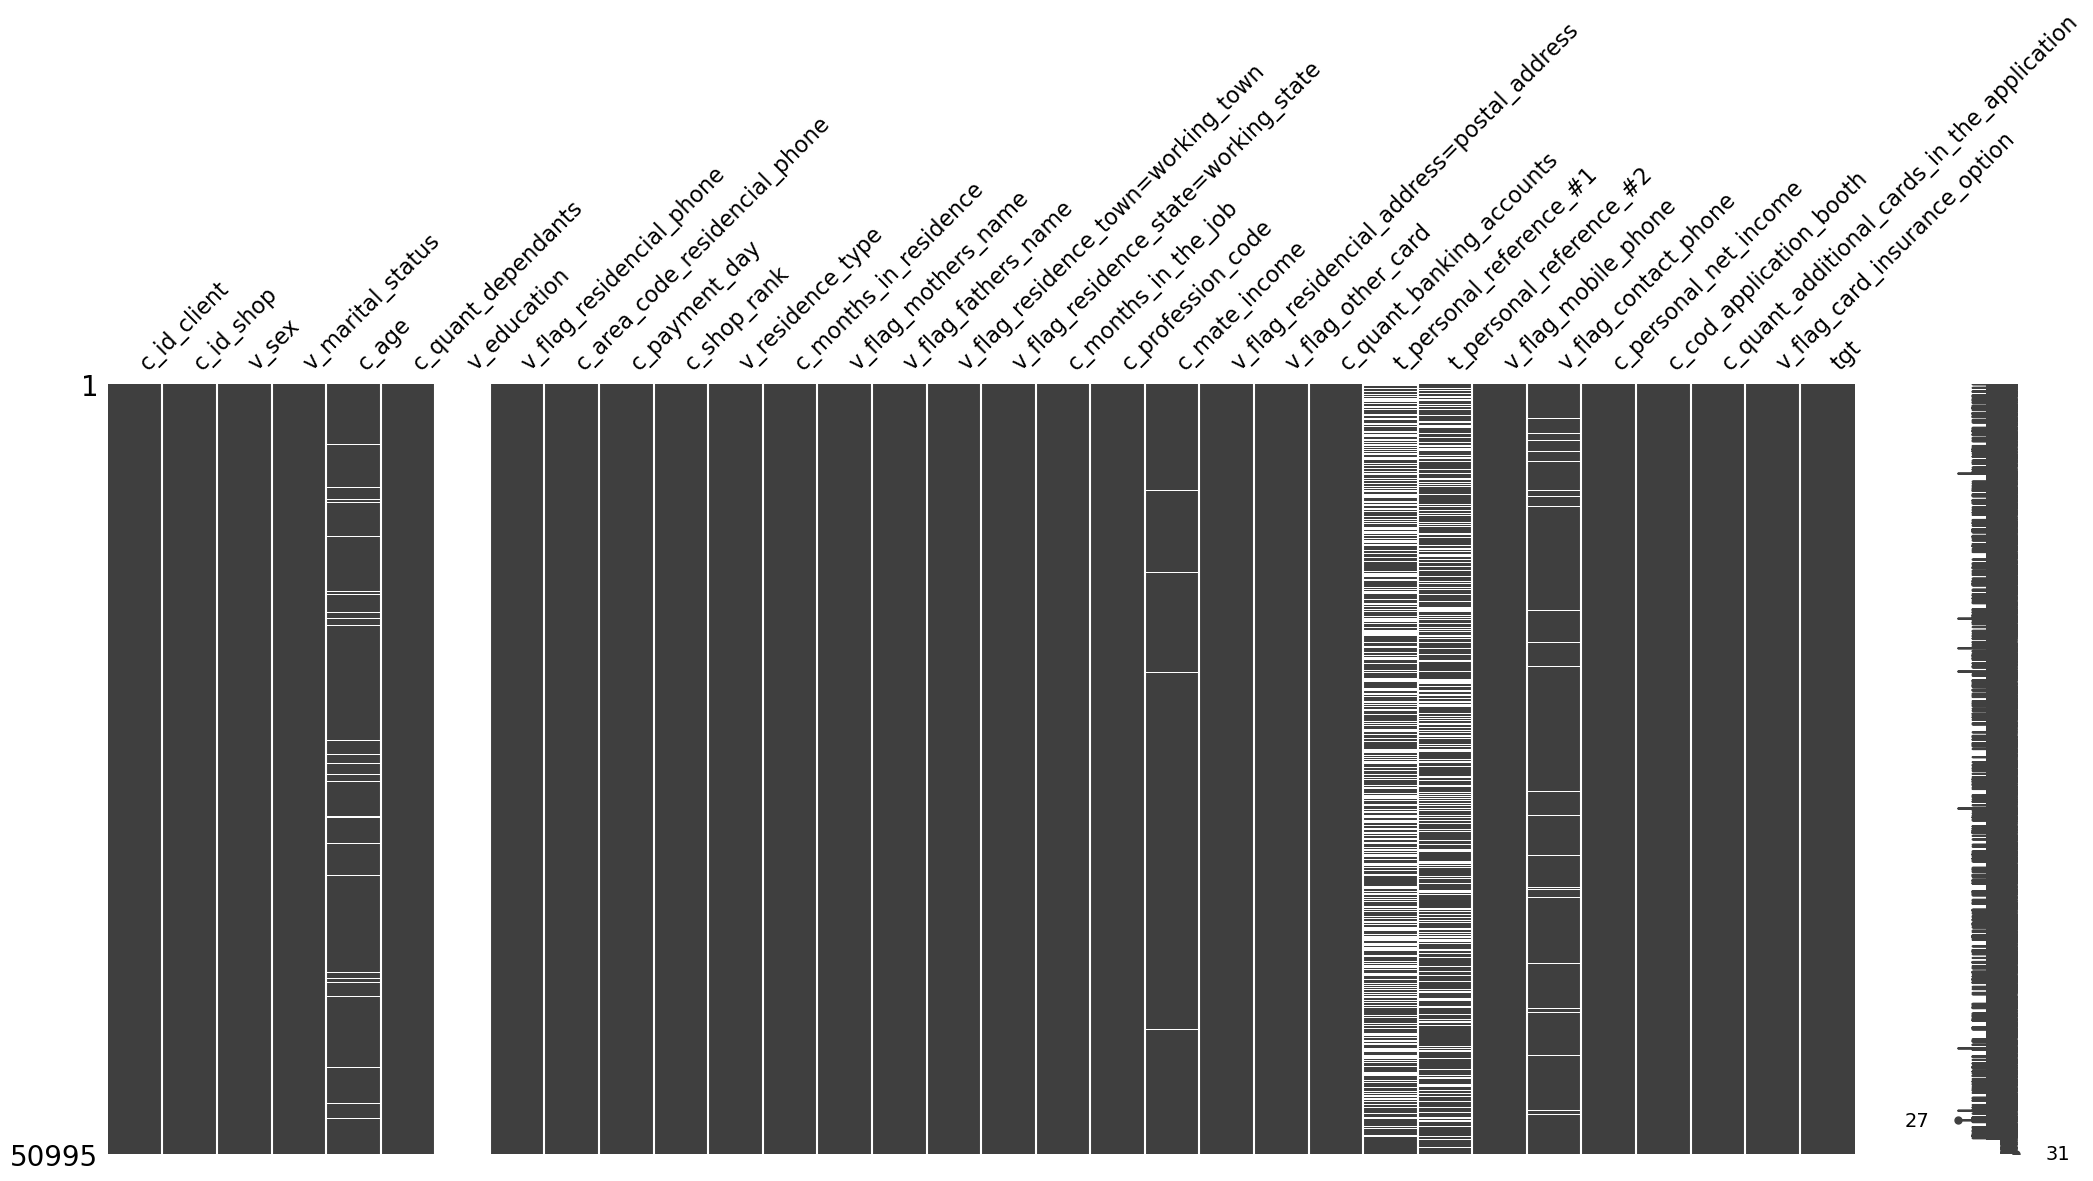

In [430]:
msno.matrix(df.iloc[:, :32])

In [431]:
comple=pd.DataFrame(df.isnull().sum())

In [432]:
comple

,0
c_id_client,0
c_id_shop,0
v_sex,3
v_marital_status,0
c_age,2472
c_quant_dependants,0
v_education,50995
v_flag_residencial_phone,0
c_area_code_residencial_phone,0
c_payment_day,0


In [433]:
comple.reset_index(inplace=True)
comple=comple.rename(columns={"index":"columna",0:"total"})
comple["completitud"]=(1-comple["total"]/df.shape[0])*100
comple=comple.sort_values(by="completitud",ascending=True)
comple.reset_index(drop=True,inplace=True)

In [434]:
comple

,columna,total,completitud
0,v_education,50995,0.000000
1,t_personal_reference_#1,20625,59.554858
2,t_personal_reference_#2,13886,72.769879
3,c_age,2472,95.152466
4,v_flag_contact_phone,1279,97.491911
5,c_mate_income,306,99.399941
6,v_sex,3,99.994117
7,c_id_client,0,100.000000
8,v_flag_residencial_address=postal_address,0,100.000000
9,v_flag_other_card,0,100.000000


In [435]:
#Las variables deben tener arriba de un 80% de completitud para ser admitibles a imputación
df.drop(columns=['v_education','t_personal_reference_#1','t_personal_reference_#2'],inplace=True)

In [436]:
df.shape

(50995, 29)

<h4>De 32 columnas pasamos a 29 al eliminar las columnas con porcentaje abajo del 80 %</h4>

<h3 style="color:#1b8bbf"> Valores fuera de naturaleza</h3>

<h5 style="color:#1b8bbf"> * Continuas * </h5>

In [437]:
#Revisar que no exixtan datos fuera de la normalidad en las variables continuas
#Utilizando la funcion  unique para que regrese los valores que contiene el arreglo
#Es decir si encuentra un valor repetido solo lo colocara una vez 
for i in df.filter(like="c_"):
    print(i)
    values = df[i].astype(str).unique()
    values.sort()
    display(values)
    print("\n")   

c_id_client


array(['1', '10', '100', ..., '9997', '9998', '9999'], dtype=object)



c_id_shop


array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '23', '24', '25', '3', '4', '5', '50', '55',
       '6', '66', '7', '77', '8', '81', '9', '96'], dtype=object)



c_age


array(['114.0', '120.0', '126.0', '132.0', '138.0', '144.0', '15.0',
       '16.0', '168.0', '17.0', '18.0', '186.0', '19.0', '192.0', '198.0',
       '20.0', '21.0', '210.0', '22.0', '222.0', '23.0', '24.0', '240.0',
       '246.0', '25.0', '26.0', '264.0', '27.0', '28.0', '282.0', '29.0',
       '30.0', '300.0', '31.0', '318.0', '32.0', '33.0', '34.0', '35.0',
       '354.0', '36.0', '37.0', '372.0', '38.0', '384.0', '39.0', '40.0',
       '41.0', '42.0', '43.0', '44.0', '45.0', '46.0', '47.0', '48.0',
       '49.0', '50.0', '51.0', '52.0', '53.0', '54.0', '55.0', '56.0',
       '57.0', '58.0', '59.0', '60.0', '61.0', '62.0', '63.0', '64.0',
       '65.0', '66.0', '67.0', '68.0', '69.0', '70.0', '71.0', '72.0',
       '73.0', '74.0', '75.0', '76.0', '77.0', '78.0', '79.0', '80.0',
       '81.0', '82.0', '83.0', '84.0', '85.0', '86.0', '87.0', '88.0',
       '89.0', '90.0', '91.0', '92.0', '93.0', '94.0', '95.0', '96.0',
       '97.0', '98.0', '99.0', 'nan'], dtype=object)



c_quant_dependants


array(['0'], dtype=object)



c_area_code_residencial_phone


array(['1', '10', '11', '12', '13', '14', '15', '17', '18', '19', '2',
       '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3',
       '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4',
       '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5',
       '50', '51', '52', '53', '54', '56', '57', '58', '59', '6', '60',
       '61', '62', '63', '64', '65', '67', '68', '69', '7', '70', '8',
       '9'], dtype=object)



c_payment_day


array(['1', '11', '12', '15', '16', '18', '20', '22', '23', '25', '27',
       '28', '3', '6', '8', '9'], dtype=object)



c_shop_rank


array(['0', '2', '3'], dtype=object)



c_months_in_residence


array(['0', '1020', '108', '1116', '1176', '1188', '12', '120', '132',
       '144', '156', '168', '180', '192', '204', '216', '228', '24',
       '240', '252', '264', '276', '288', '300', '312', '324', '336',
       '348', '36', '360', '372', '384', '396', '408', '420', '432',
       '444', '456', '468', '48', '480', '492', '504', '516', '528',
       '540', '552', '564', '576', '588', '60', '600', '612', '624',
       '636', '648', '660', '672', '684', '696', '708', '72', '720',
       '732', '744', '756', '780', '792', '804', '816', '828', '84',
       '840', '852', '876', '888', '900', '912', '96'], dtype=object)



c_months_in_the_job


array(['0', '108', '1104', '1176', '12', '120', '132', '144', '156',
       '168', '180', '192', '204', '216', '228', '24', '240', '252',
       '264', '276', '288', '300', '312', '324', '336', '348', '36',
       '360', '372', '384', '396', '408', '420', '432', '444', '456',
       '468', '48', '480', '492', '504', '516', '552', '576', '588', '60',
       '600', '612', '660', '684', '708', '72', '780', '84', '852', '96'],
      dtype=object)



c_profession_code


array(['0', '1', '10', '100', '102', '103', '105', '106', '107', '108',
       '109', '11', '110', '113', '114', '115', '116', '117', '118',
       '119', '12', '120', '121', '123', '124', '125', '127', '129', '13',
       '130', '131', '132', '133', '134', '135', '136', '137', '138',
       '139', '140', '141', '15', '150', '151', '152', '153', '154',
       '155', '158', '159', '16', '161', '163', '164', '165', '166',
       '167', '168', '169', '17', '18', '19', '2', '201', '202', '203',
       '205', '209', '21', '210', '211', '213', '214', '215', '217',
       '218', '219', '22', '220', '221', '222', '223', '24', '25', '250',
       '251', '253', '254', '255', '26', '260', '261', '262', '263',
       '264', '265', '266', '28', '29', '3', '30', '300', '301', '302',
       '304', '305', '307', '308', '309', '31', '310', '311', '312', '32',
       '33', '34', '35', '350', '351', '352', '36', '37', '38', '39', '4',
       '40', '400', '401', '402', '403', '41', '42', '43', '44', '45',



c_mate_income


array(['0.0', '1.0', '100.0', '1000.0', '10000.0', '1002.0', '1003.0',
       '1010.0', '1012.0', '1014.0', '1016.0', '1017.0', '1018.0',
       '1020.0', '1021.0', '1022.0', '1025.0', '1026.0', '1030.0',
       '1032.0', '1033.0', '1034.0', '1036.0', '1037.0', '1038.0',
       '1050.0', '1051.0', '1052.0', '1054.0', '1055.0', '1056.0',
       '1057.0', '1060.0', '1064.0', '1065.0', '1066.0', '1069.0',
       '1070.0', '1072.0', '1075.0', '1076.0', '1077.0', '1083.0',
       '1086.0', '1092.0', '1096.0', '1098.0', '1099.0', '1100.0',
       '1108.0', '1109.0', '1110.0', '1120.0', '1121.0', '1126.0',
       '1131.0', '1132.0', '1133.0', '1136.0', '1141.0', '1144.0',
       '1147.0', '11476.0', '1148.0', '1150.0', '1151.0', '1154.0',
       '1157.0', '1158.0', '1162.0', '1163.0', '1167.0', '1170.0',
       '1177.0', '1184.0', '1200.0', '1201.0', '1205.0', '1209.0',
       '1210.0', '1215.0', '1216.0', '1227.0', '1230.0', '1239.0',
       '1249.0', '1250.0', '1263.0', '1269.0', '1273.0', 



c_quant_banking_accounts


array(['0'], dtype=object)



c_personal_net_income


array(['0.0', '1.0', '10.0', ..., '998.0', '999.0', 'n.a.'], dtype=object)



c_cod_application_booth


array(['0'], dtype=object)



c_quant_additional_cards_in_the_application


array(['0', '1', '2', '3'], dtype=object)

<h4>Conclusiones</h4>

<h5>c_age </h5>

En caso de c_age tenemos una muestra que detona una edad demasiado alta de acuerdo a los indices de edades los rangos de vida de un humano extrañamente son por arriba de los 100 años.
Agrenado que los creditos tienen que avalar que va a ser pagado por lo que el rango  para que sean otorgados de edad 18  a 70 años.

<h5>c_months_in_residence</h5> y <h5>c_months_in_the_job</h5>

Si tomanos en cuenta que el año tiene 12 meses y dividimos los valores de salida entre 12 podemos detectar alguna anomalia y descartar nuevamente valores por arriba del rango planteado 70 años de vida.


<h5 style="color:#1b8bbf"> * Categoricas * </h5>

In [438]:
#Revisar que no exixtan datos fuera de la normalidad en las variables categoricas
#Utilizando la funcion  unique para que regrese los valores que contiene el arreglo
#Es decir si encuentra un valor repetido solo lo colocara una vez 
for i in df.filter(like="v_"):
    print(i)
    values = df[i].astype(str).unique()
    values.sort()
    display(values)
    print("\n")   

v_sex


array(['F', 'M', 'n.a', 'nan'], dtype=object)



v_marital_status


array(['C', 'C ', 'D', 'D ', 'O', 'O ', 'S', 'S ', 'V', 'V '],
      dtype=object)



v_flag_residencial_phone


array(['N', 'Y', 'n', 'y'], dtype=object)



v_residence_type


array([' ', ' a', ' c', ' o', ' p', 'A', 'A ', 'C', 'C ', 'O', 'O ', 'P',
       'P ', 'a', 'c', 'o', 'p', 'p '], dtype=object)



v_flag_mothers_name


array(['N', 'Y'], dtype=object)



v_flag_fathers_name


array(['N', 'Y'], dtype=object)



v_flag_residence_town=working_town


array(['N', 'Y'], dtype=object)



v_flag_residence_state=working_state


array(['N', 'Y'], dtype=object)



v_flag_residencial_address=postal_address


array(['N', 'Y'], dtype=object)



v_flag_other_card


array(['N'], dtype=object)



v_flag_mobile_phone


array(['N'], dtype=object)



v_flag_contact_phone


array(['N', 'nan'], dtype=object)



v_flag_card_insurance_option


array(['N'], dtype=object)

<h4>Conclusiones</h4>

<h5>v_sex</h5>
En esta columna esperamos dos tipos de valor sin embargo contiene datos vacios y datos comoo n.a

<h5>v_marital_status</h5>
Nos regresa el siguiente arreglo 
array(['C', 'C ', 'D', 'D ', 'O', 'O ', 'S', 'S ', 'V', 'V '] en el cual nos esta clasificando a todas las categorias como dobles por tener un espacio despues de letra lo cual se puede normalizar para que esto se reduzca

<h5>v_flag_residencial_phone</h5>
Para este caso su salida del arreglo se denota que tenemos categorias en minusculas y mayusculas siendo la misma categoria, en la normalización seran homologadas 

<h5>v_residence_type</h5>

Nuevamente alteraciones por valores en mayusculas y minusculas y espacios despues de la letra indicada ademas de un espacio de un caracter ' '

<h5>v_flag_contact_phone</h5>

Revisión a valores NaN


Para el caso de las continuas si se muestarn valores NaN en las categoricas transformaremos a NaN los que son necesarios.

In [439]:
#1 v_sex

df['v_sex']=df['v_sex'].where(df['v_sex']!='n.a',np.nan)
values = df['v_sex'].astype(str).unique()
values.sort()
display(values)

#2 v_residence_type

df['v_residence_type']=df['v_residence_type'].where(df['v_residence_type']!=' ',np.nan)
values = df['v_residence_type'].astype(str).unique()
values.sort()
display(values)

#3 c_personal_net_income

df['c_personal_net_income']=df['c_personal_net_income'].where(df['c_personal_net_income']!='n.a.',np.nan)
values = df['c_personal_net_income'].astype(str).unique()
values.sort()
display(values)

array(['F', 'M', 'nan'], dtype=object)

array([' a', ' c', ' o', ' p', 'A', 'A ', 'C', 'C ', 'O', 'O ', 'P', 'P ',
       'a', 'c', 'nan', 'o', 'p', 'p '], dtype=object)

array(['0.0', '1.0', '10.0', ..., '998.0', '999.0', 'nan'], dtype=object)

Revisamos nuevamente COMPLETITUD

In [440]:
df.isnull().sum(axis=0)

c_id_client                                       0
c_id_shop                                         0
v_sex                                           794
v_marital_status                                  0
c_age                                          2472
c_quant_dependants                                0
v_flag_residencial_phone                          0
c_area_code_residencial_phone                     0
c_payment_day                                     0
c_shop_rank                                       0
v_residence_type                               7476
c_months_in_residence                             0
v_flag_mothers_name                               0
v_flag_fathers_name                               0
v_flag_residence_town=working_town                0
v_flag_residence_state=working_state              0
c_months_in_the_job                               0
c_profession_code                                 0
c_mate_income                                   306
v_flag_resid

<AxesSubplot:>

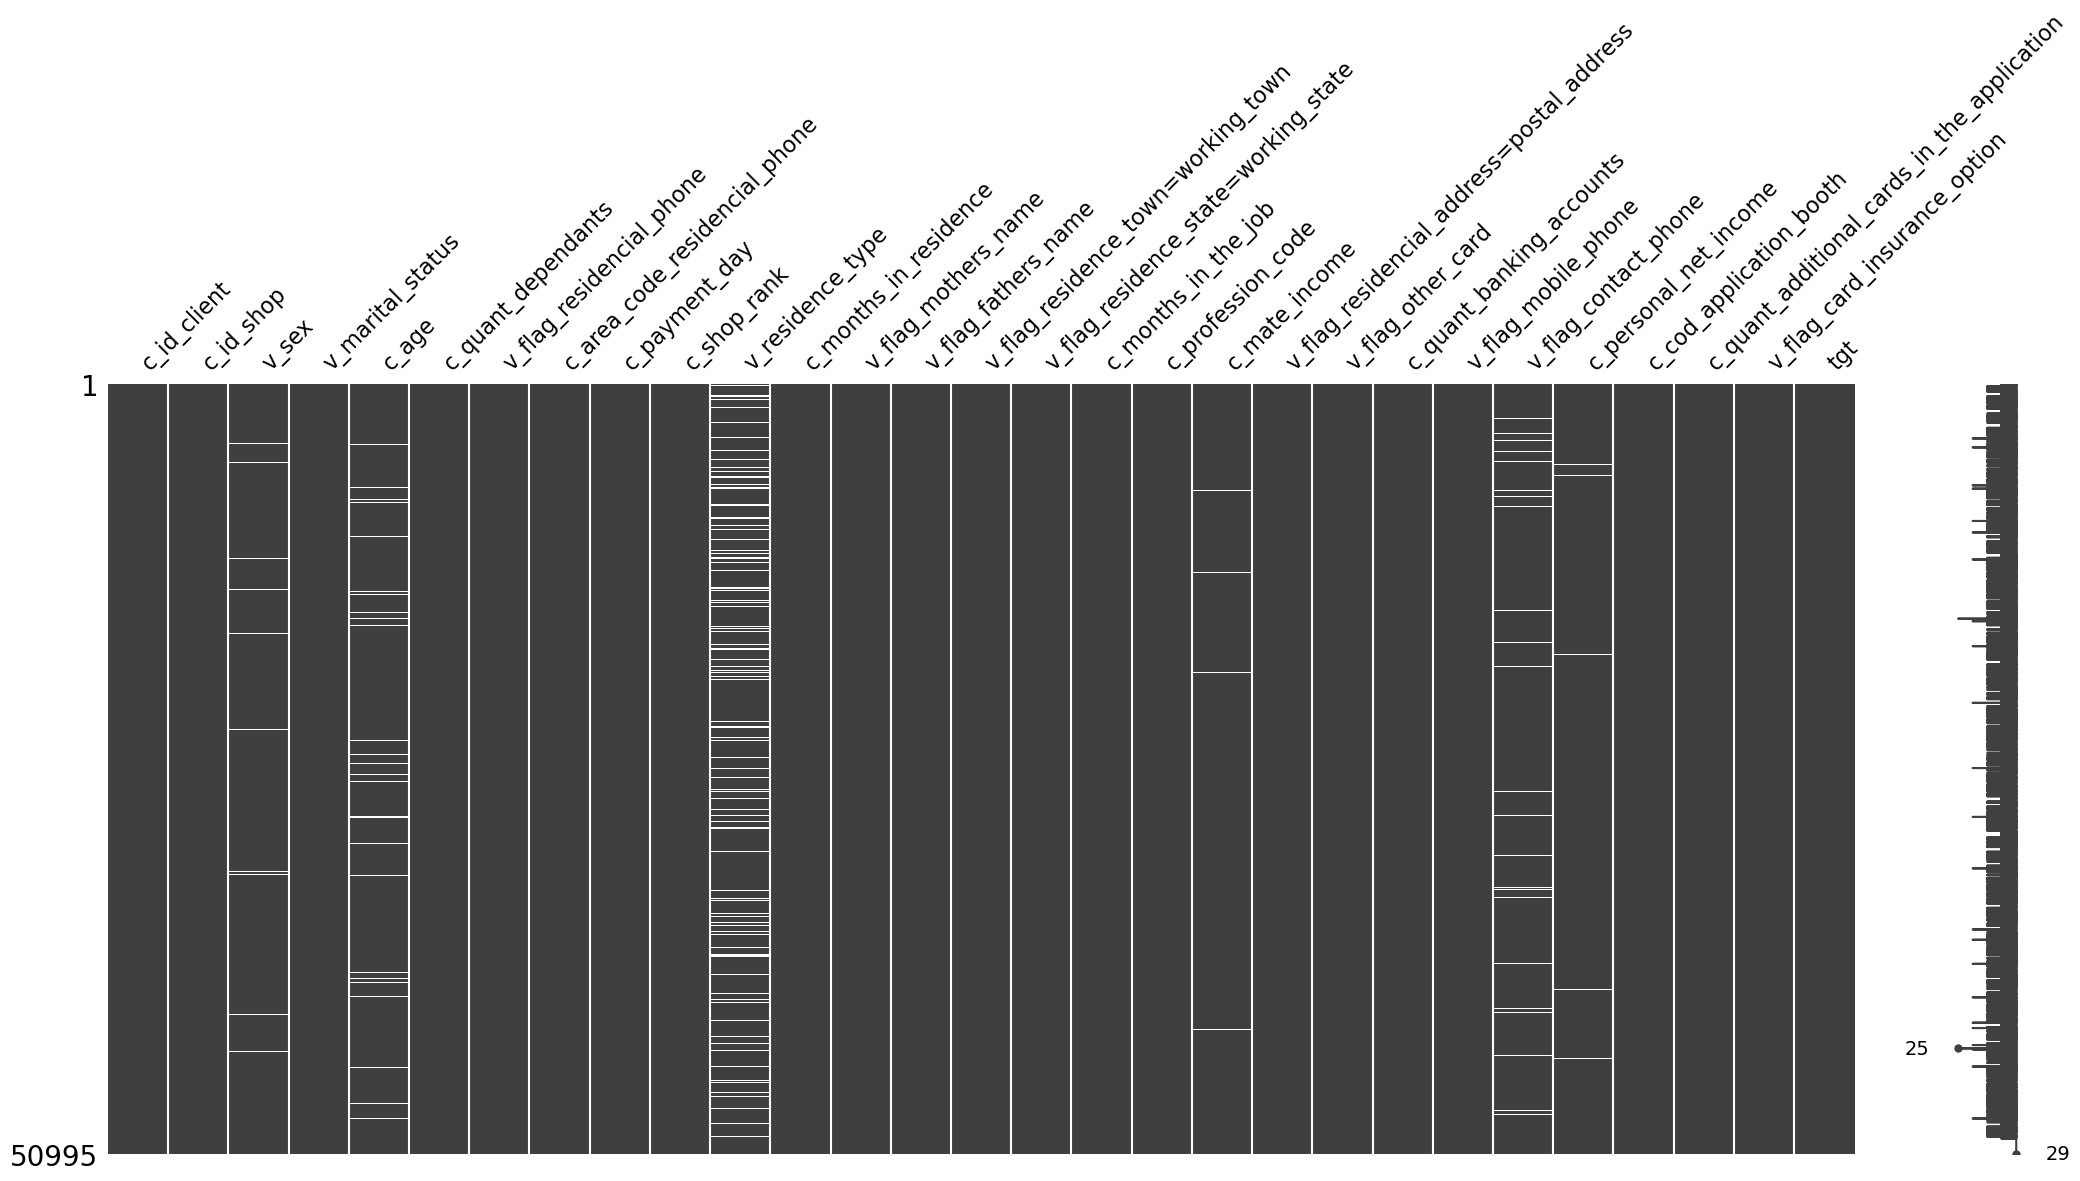

In [441]:
msno.matrix(df.iloc[:, :29])

In [442]:
comple=pd.DataFrame(df.isnull().sum())

In [443]:
comple

,0
c_id_client,0
c_id_shop,0
v_sex,794
v_marital_status,0
c_age,2472
c_quant_dependants,0
v_flag_residencial_phone,0
c_area_code_residencial_phone,0
c_payment_day,0
c_shop_rank,0


In [444]:
comple.reset_index(inplace=True)
comple=comple.rename(columns={"index":"columna",0:"total"})
comple["completitud"]=(1-comple["total"]/df.shape[0])*100
comple=comple.sort_values(by="completitud",ascending=True)
comple.reset_index(drop=True,inplace=True)

In [445]:
comple

,columna,total,completitud
0,v_residence_type,7476,85.339739
1,c_age,2472,95.152466
2,v_flag_contact_phone,1279,97.491911
3,v_sex,794,98.442985
4,c_mate_income,306,99.399941
5,c_personal_net_income,198,99.611727
6,c_id_client,0,100.000000
7,c_quant_additional_cards_in_the_application,0,100.000000
8,c_cod_application_booth,0,100.000000
9,v_flag_mobile_phone,0,100.000000


<h5>Tenemos los datos por arriba del 80% por lo tanto no quitaremos alguna columna mas por el momento.</h5>

<h3 style="color:#1b8bbf"> Limpieza de variables y transformacion de tipo de dato</h3>

In [446]:
#Como se habia observado en la parte de valores fuera de naturaleza en las categoricas se puede lograr simplificar
#Aplico normalizacion como fue visto en clase para estandarizar / homologar datos

#Colunma v_marital_status valores
df['v_marital_status'].value_counts(1)

S     0.504932
C     0.342543
O     0.055417
V     0.048201
D     0.043024
S     0.003138
C     0.001941
O     0.000294
V     0.000275
D     0.000235
Name: v_marital_status, dtype: float64

In [447]:
#Diccionario a transformar
dictio_marital={'C ':'C','S ':'S','O ':'O','V ':'V','D ':'D'}

In [448]:
#Remplazar valores 
df['v_marital_status'].replace(dictio_marital).value_counts(1)

S    0.508069
C    0.344485
O    0.055711
V    0.048475
D    0.043259
Name: v_marital_status, dtype: float64

In [449]:
#Remplazar en la columna 
df['v_marital_status']=df['v_marital_status'].replace(dictio_marital)

In [450]:
#Validacion
df['v_marital_status'].value_counts(1)

S    0.508069
C    0.344485
O    0.055711
V    0.048475
D    0.043259
Name: v_marital_status, dtype: float64

In [451]:
#Colunma v_flag_residencial_phone
df['v_flag_residencial_phone'].value_counts(1)

Y    0.807883
N    0.182292
y    0.007962
n    0.001863
Name: v_flag_residencial_phone, dtype: float64

In [452]:
#Diccionario a transformar
dictio_residencial={'y':'Y','n':'N'}

In [453]:
#Remplazar valores 
df['v_flag_residencial_phone'].replace(dictio_residencial).value_counts(1)

Y    0.815845
N    0.184155
Name: v_flag_residencial_phone, dtype: float64

In [454]:
#Remplazar en la columna 
df['v_flag_residencial_phone']=df['v_flag_residencial_phone'].replace(dictio_residencial)

In [455]:
#Colunma v_residence_type valores
df['v_residence_type'].value_counts(1)

P     0.734622
A     0.127255
C     0.086928
O     0.040948
 p    0.004848
P     0.001930
p     0.001149
 a    0.000804
 c    0.000529
A     0.000230
 o    0.000207
a     0.000207
O     0.000092
C     0.000092
c     0.000092
o     0.000046
p     0.000023
Name: v_residence_type, dtype: float64

In [456]:
#Diccionario a transformar
dictio_residence={'p':'P',' p':'P','P ':'P','p ':'P',' a':'A','A ':'A','a':'A',' c':'C','C ':'C','c':'C',' o':'O','O ':'O','o':'O'}

In [457]:
#Remplazar valores 
df['v_residence_type'].replace(dictio_residence).value_counts(1)

P    0.742572
A    0.128496
C    0.087640
O    0.041292
Name: v_residence_type, dtype: float64

In [458]:
#Remplazar en la columna 
df['v_residence_type']=df['v_residence_type'].replace(dictio_residence)

In [459]:
for i in df.filter(like="c_"):
    print(i)
    values = df[i].dtype
    display(values)
    print("")  

c_id_client


dtype('int64')


c_id_shop


dtype('int64')


c_age


dtype('float64')


c_quant_dependants


dtype('int64')


c_area_code_residencial_phone


dtype('int64')


c_payment_day


dtype('int64')


c_shop_rank


dtype('int64')


c_months_in_residence


dtype('int64')


c_months_in_the_job


dtype('int64')


c_profession_code


dtype('int64')


c_mate_income


dtype('float64')


c_quant_banking_accounts


dtype('int64')


c_personal_net_income


dtype('O')


c_cod_application_booth


dtype('int64')


c_quant_additional_cards_in_the_application


dtype('int64')

In [460]:
#La edad no es un valor flotante por lo que se convierte a entero con el metodo fillna transformamos los NAN a 0 
df.c_age = df.c_age.fillna(0)
df.c_age = df.c_age.astype(int)

In [461]:
#Los ingresos netos deberian ser de tipo float no object 
#Se realiza la conversion 
df.c_personal_net_income = df.c_personal_net_income.fillna(0)
df.c_personal_net_income = df.c_personal_net_income.astype(float)

In [462]:
df.dtypes

c_id_client                                      int64
c_id_shop                                        int64
v_sex                                           object
v_marital_status                                object
c_age                                            int64
c_quant_dependants                               int64
v_flag_residencial_phone                        object
c_area_code_residencial_phone                    int64
c_payment_day                                    int64
c_shop_rank                                      int64
v_residence_type                                object
c_months_in_residence                            int64
v_flag_mothers_name                             object
v_flag_fathers_name                             object
v_flag_residence_town=working_town              object
v_flag_residence_state=working_state            object
c_months_in_the_job                              int64
c_profession_code                                int64
c_mate_inc

<h5>En este punto todas las continuas cuentan con su tipo de dato correcto</h5>

In [463]:
df.isnull().sum(axis=0)

c_id_client                                       0
c_id_shop                                         0
v_sex                                           794
v_marital_status                                  0
c_age                                             0
c_quant_dependants                                0
v_flag_residencial_phone                          0
c_area_code_residencial_phone                     0
c_payment_day                                     0
c_shop_rank                                       0
v_residence_type                               7476
c_months_in_residence                             0
v_flag_mothers_name                               0
v_flag_fathers_name                               0
v_flag_residence_town=working_town                0
v_flag_residence_state=working_state              0
c_months_in_the_job                               0
c_profession_code                                 0
c_mate_income                                   306
v_flag_resid

<h3 style="color:#1b8bbf"> Cruce de la tabla </h3>

In [464]:
#Mandamos llamar a la tabla adicional
ocupacion

,PROFESSION_CODE,PROFESSION
0,999,Healthcare Practitioners and Technical
1,950,Healthcare Practitioners and Technical
2,13,Educational Instruction and Library
3,205,Production
4,703,Educational Instruction and Library
...,...,...
290,152,Production
291,516,"Life, Physical, and Social Science"
292,50,Educational Instruction and Library
293,850,"Life, Physical, and Social Science"


In [465]:
#transformamos en minusculas tenga la misma estructura que el df
ocupacion.columns=ocupacion.columns.str.lower()

In [466]:
#Categorizamos
ocupacion=ocupacion.rename(columns={'profession_code':'c_profession_code','profession':'v_profession'})

In [467]:
#Validamos el rename 
ocupacion.dtypes

c_profession_code     int64
v_profession         object
dtype: object

In [468]:
#Hacemos un join entre df & ocupacion
data=pd.merge(df,ocupacion,on='c_profession_code')

In [469]:
pd.DataFrame(data.columns)

,0
0,c_id_client
1,c_id_shop
2,v_sex
3,v_marital_status
4,c_age
5,c_quant_dependants
6,v_flag_residencial_phone
7,c_area_code_residencial_phone
8,c_payment_day
9,c_shop_rank


<h1 style = 'color:#e83a3a'> 2. Analisis Exploratorio</h1>

En análisis exploratorio tiene el objetivo de entender el significado y la relevancia de cada variable con respecto al problema. 
Además apartir de este análisis se pueden determinar que acciones tomar para cada variable

In [470]:
#Validamos nuevamente nuesta info 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50995 entries, 0 to 50999
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   c_id_client                                  50995 non-null  int64  
 1   c_id_shop                                    50995 non-null  int64  
 2   v_sex                                        50201 non-null  object 
 3   v_marital_status                             50995 non-null  object 
 4   c_age                                        50995 non-null  int64  
 5   c_quant_dependants                           50995 non-null  int64  
 6   v_flag_residencial_phone                     50995 non-null  object 
 7   c_area_code_residencial_phone                50995 non-null  int64  
 8   c_payment_day                                50995 non-null  int64  
 9   c_shop_rank                                  50995 non-null  int64  
 10

In [471]:
#Nos ayuda a visualizar como se estam comportando los datos, para ver si hay valores atipocos, si estan dispersos o no 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
c_id_client,50995.0,25001.456908,14431.249686,1.0,12507.5,25001.0,37500.5,50000.0
c_id_shop,50995.0,20.837670,14.603464,1.0,12.0,21.0,24.0,96.0
c_age,50995.0,33.610060,16.133505,0.0,22.0,32.0,43.0,384.0
c_quant_dependants,50995.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
c_area_code_residencial_phone,50995.0,33.782979,10.433581,1.0,31.0,31.0,31.0,70.0
c_payment_day,50995.0,15.343328,7.167081,1.0,9.0,12.0,20.0,28.0
c_shop_rank,50995.0,0.015845,0.211227,0.0,0.0,0.0,0.0,3.0
c_months_in_residence,50995.0,153.108187,136.432397,0.0,36.0,120.0,240.0,1188.0
c_months_in_the_job,50995.0,50.629670,73.920691,0.0,12.0,24.0,60.0,1176.0
c_profession_code,50995.0,482.911403,382.224503,0.0,79.0,514.0,864.0,999.0


In [472]:
#Descripicin de categoricas
df.describe(include='O')

,v_sex,v_marital_status,v_flag_residencial_phone,v_residence_type,v_flag_mothers_name,v_flag_fathers_name,v_flag_residence_town=working_town,v_flag_residence_state=working_state,v_flag_residencial_address=postal_address,v_flag_other_card,v_flag_mobile_phone,v_flag_contact_phone,v_flag_card_insurance_option
count,50201,50995,50995,43519,50995,50995,50995,50995,50995,50995,50995,49716,50995
unique,2,5,2,4,2,2,2,2,2,1,1,1,1
top,F,S,Y,P,Y,Y,N,Y,Y,N,N,N,N
freq,34944,25909,41604,32316,50800,48911,27834,50556,49909,50995,50995,49716,50995


In [473]:
#Hasta este punto deberia estar todo limpio 

In [481]:
#Aplicamos este factor como fue visto en clase 
for col in df.filter(like="v_"):
    bar(df,col,col).show()